<a href="https://colab.research.google.com/github/uwituzeb/summative-intro-to-ml/blob/main/summative_Intro_to_ml_bernice_uwituze_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


# **Project Name: Pathway Finder**

**Problem Statement**

In Rwanda, high school students face significant challenges due to an inadequate career guidance system. This issue has led to limited career exploration, with students not being able to follow their passions because they are often not aware of what career options are available.

**Data**

The dataset used is sourced from Kaggle although it was initially directed to university students, the data was pre-processed to cater to high school students. The data contains about 1000 rows of data and 10 columns of data which are candidateId, age, education, gpa, interest, favorite subject, extracurriculars, personality trait and recommended career which is our target.

In [ ]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/high_school_career_recommendation_dataset.csv"
df = pd.read_csv(path)
df.head()




Mounted at /content/drive


,CandidateID,Age,Education,GPA,Interest,Favorite_Subject,Extracurriculars,Personality_Trait,Recommended_Career
0,1,16,O-Level,3.51,Business,Economics,Drama Club,Analytical,Financial Analyst
1,2,17,A-Level,3.52,Humanities,History,Environmental Club,Leader,Lawyer
2,3,16,O-Level,2.85,Business,Physical Education,Debate Team,Leader,Business Manager
3,4,17,A-Level,3.53,Humanities,History,Math Team,Analytical,Software Engineer
4,5,14,O-Level,3.00,Humanities,English,Math Team,Social,Journalist


In [ ]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Split data into features and target
X = df.drop('Recommended_Career', axis=1)
y = df['Recommended_Career']

# One-hot encoding for categorical features
X = pd.get_dummies(X, columns=['Education', 'Interest', 'Favorite_Subject',
                       'Extracurriculars', 'Personality_Trait'])

# Splitting into train and test
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

#Second split to get validation and test data
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Scaling features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_val = tf.keras.utils.to_categorical(y_val_encoded, num_classes=len(label_encoder.classes_))
y_test = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

print('Training data shape', x_train_scaled.shape)
print('Validation data shape', x_val_scaled.shape)
print('Test data shape', x_test_scaled.shape)

Training data shape (600, 51)
Validation data shape (200, 51)
Test data shape (200, 51)


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




In [ ]:
from PIL import Image
import matplotlib.image as

#Task: Define a function that creates models without and With specified Optimization techniques


In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


def define_model(optimization: str='default', regularization_type=None, early_stopping: bool=False, dropout: float=0.0, learning_rate: float=0.001, epochs=100, batch_size=32):
  model= Sequential()
  input_shape = x_train_scaled.shape[1]
  num_classes = len(label_encoder.classes_)

  # Regularization configuration
  regularization = None
  if regularization_type == 'l1':
    regularization = l1(0.01)
  elif regularization_type == 'l2':
    regularization = l2(0.01)
  elif regularization_type == 'l1_l2':
    regularization = l1_l2(l1=0.01, l2=0.01)

  # Optimizer configuration
  optimizer = None
  if optimization == 'adam':
    optimizer = Adam(learning_rate=learning_rate)
  elif optimization == 'rmsprop':
    optimizer = RMSprop(learning_rate=learning_rate)
  elif optimization == 'sgd':
    optimizer = SGD(learning_rate=learning_rate)
  else:
    optimizer = Adam()

  # Model architecture

  #First dense layer
  model.add(Dense(32, activation="relu", input_shape=(input_shape,), kernel_regularizer=regularization))
  model.add(BatchNormalization())
  if dropout > 0:
    model.add(Dropout(dropout))

  # Hidden layers
  model.add(Dense(16, activation="relu", kernel_regularizer=regularization))
  model.add(BatchNormalization())
  if dropout > 0:
    model.add(Dropout(dropout))

  model.add(Dense(8, activation="relu", kernel_regularizer=regularization))
  model.add(BatchNormalization())
  if dropout > 0:
    model.add(Dropout(dropout))

  # Output layer
  model.add(Dense(num_classes, activation="softmax"))

  # Configure callbacks
  callbacks = []
  if early_stopping:
    callbacks.append(EarlyStopping(monitor="val_loss",patience=10, restore_best_weights=True))

  # Compile the model
  model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

  history = model.fit(
      x_train_scaled, y_train,
      validation_data=(x_val_scaled, y_val),
      epochs=epochs,
      batch_size=batch_size,
      verbose=1,
      callbacks=callbacks

  )
  return model, history

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [ ]:
def loss_curve_plot(history):
  #Extract training and validation loss
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history.get('accuracy')
  val_accuracy = history.history.get('val_accuracy')

  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'b-', label='Training loss')
  plt.plot(epochs, val_loss, 'r-', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  print(f"Training Accuracy: {train_accuracy[-1]:.4f}")
  print(f"Validation Accuracy: {val_accuracy[-1]:.4f}")





# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0514 - loss: 3.1774 - val_accuracy: 0.0300 - val_loss: 2.9856
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0561 - loss: 3.0532 - val_accuracy: 0.0550 - val_loss: 2.9229
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0881 - loss: 2.8999 - val_accuracy: 0.0850 - val_loss: 2.8577
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1405 - loss: 2.7704 - val_accuracy: 0.1350 - val_loss: 2.7826
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1688 - loss: 2.6938 - val_accuracy: 0.2000 - val_loss: 2.7044
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2088 - loss: 2.5803 - val_accuracy: 0.2400 - val_loss: 2.6229
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2145 - loss: 2.5683 - val_accuracy: 0.2800 - val_loss: 2.5357
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2956 - loss: 2.4381 - val_accuracy: 0.3150 - val_loss: 2.

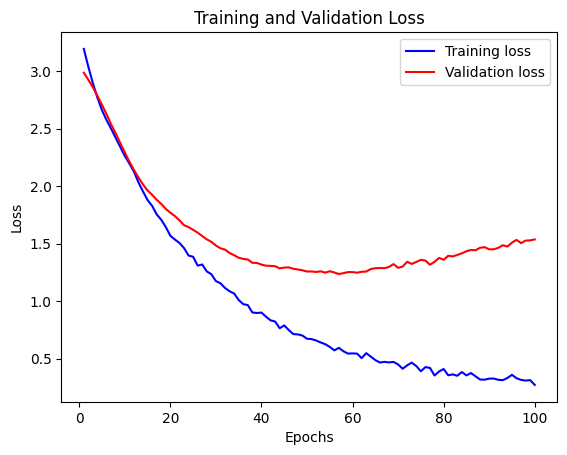

Training Accuracy: 0.9233
Validation Accuracy: 0.5850
Train: 0.960, Test: 0.585


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.56      0.83      0.67         6
           2       0.33      0.25      0.29         4
           3       0.80      0.42      0.55        19
           4       0.00      0.00      0.00         1
           5       0.17      0.10      0.12        10
           6       0.33      0.29      0.31         7
           7       0.40      0.67      0.50         9
           8       0.56      0.83      0.67        12
           9       0.75      0.50      0.60         6
          10       0.75      0.53      0.62        17
          11       0.45      0.83      0.59         6
          12       0.40      0.60      0.48        10
          13       0.60      0.75      0.67         4
          14       0.00      0.00      0.00         0
          15       0.83      0.31      0.45        16
          16       0.75      0.68      0.71

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

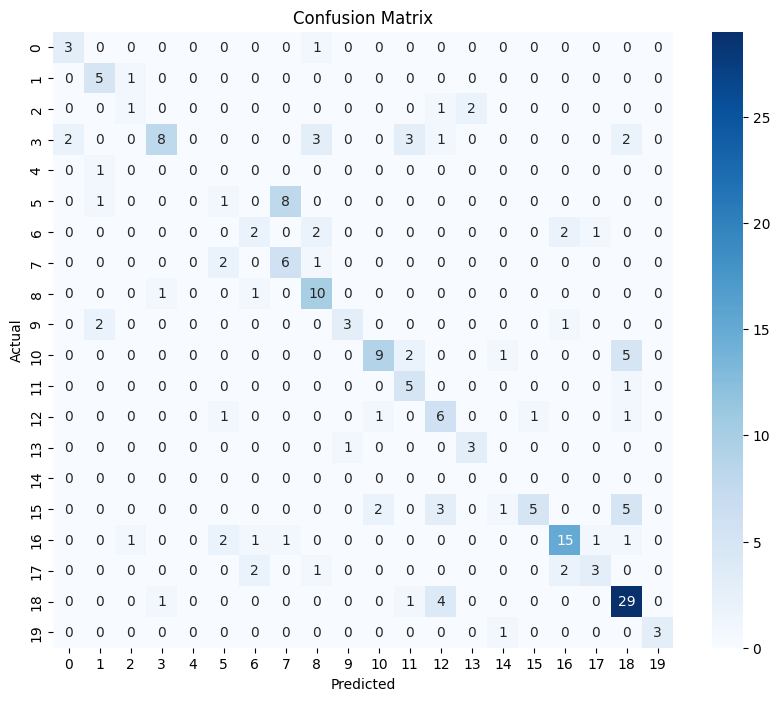

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#default model

model_1, history_1 = define_model()
loss_curve_plot(history_1)

# Evaluate the model
_, train_acc = model_1.evaluate(x_train_scaled, y_train, verbose=0)
_, test_acc = model_1.evaluate(x_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

y_pred_prob = model_1.predict(x_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

y_test_multiclass = np.argmax(y_test, axis=1)
print(classification_report(y_test_multiclass, y_pred))


#confusion matrix
cm = confusion_matrix(y_test_multiclass, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.0527 - loss: 3.9492 - val_accuracy: 0.0650 - val_loss: 3.7375
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0733 - loss: 3.8838 - val_accuracy: 0.1050 - val_loss: 3.6573
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1052 - loss: 3.6473 - val_accuracy: 0.1050 - val_loss: 3.5926
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1093 - loss: 3.6772 - val_accuracy: 0.1700 - val_loss: 3.5311
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0989 - loss: 3.6147 - val_accuracy: 0.1950 - val_loss: 3.4689
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1705 - loss: 3.4968 - val_accuracy: 0.2350 - val_loss: 3.4040
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1584 - loss: 3.4099 - val_accuracy: 0.2650 - val_loss: 3.3347
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1876 - loss: 3.3293 - val_accuracy: 0.3050 - val_loss: 3.

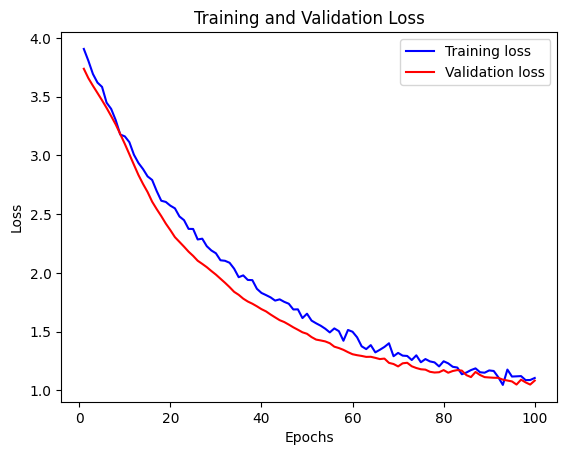

Training Accuracy: 0.6617
Validation Accuracy: 0.6700
Train: 0.838, Test: 0.625
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.55      1.00      0.71         6
           2       0.00      0.00      0.00         4
           3       0.69      0.47      0.56        19
           4       0.00      0.00      0.00         1
           5       0.33      0.20      0.25        10
           6       0.00      0.00      0.00         7
           7       0.40      0.67      0.50         9
           8       0.48      0.83      0.61        12
           9       1.00      0.33      0.50         6
          10       0.88      0.82      0.85        17
          11       0.50      0.50      0.50         6
          12       0.60      0.90      0.72        10
          13       0.57      1.00      0.73         4
          14       0.00      0.00      0.00         0
          15     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

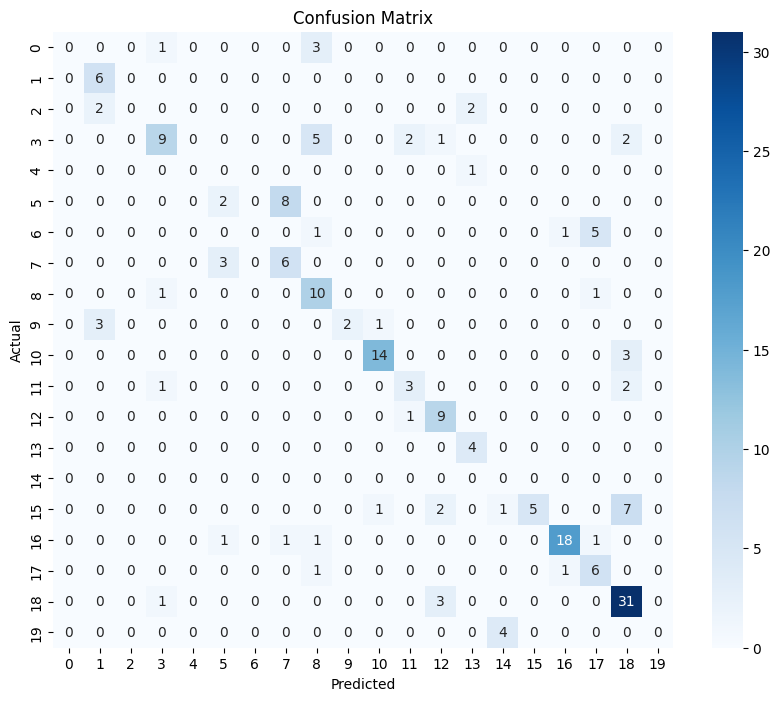

In [ ]:
#TODO:
model_2, history_2 = define_model(
    optimization='adam',
    regularization_type='l2',
    early_stopping=True,
    dropout=0.2,

)
loss_curve_plot(history_2)
#print out confusion matrix and error analysis metrics after the cell
# Evaluate the model
_, train_acc = model_2.evaluate(x_train_scaled, y_train, verbose=0)
_, test_acc = model_2.evaluate(x_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

y_pred_prob = model_2.predict(x_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_multiclass = np.argmax(y_test, axis=1)
print(classification_report(y_test_multiclass, y_pred))


#confusion matrix
cm = confusion_matrix(y_test_multiclass, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0378 - loss: 6.7229 - val_accuracy: 0.1050 - val_loss: 6.4002
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0567 - loss: 6.4932 - val_accuracy: 0.1350 - val_loss: 6.2534
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1036 - loss: 6.3167 - val_accuracy: 0.1900 - val_loss: 6.1064
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1227 - loss: 6.1434 - val_accuracy: 0.2250 - val_loss: 5.9516
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1485 - loss: 5.9099 - val_accuracy: 0.2850 - val_loss: 5.7989
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1704 - loss: 5.7879 - val_accuracy: 0.3150 - val_loss: 5.6477
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1971 - loss: 5.5843 - val_accuracy: 0.3450 - val_loss: 5.4948
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2577 - loss: 5.3849 - val_accuracy: 0.3750 - val_loss: 5.

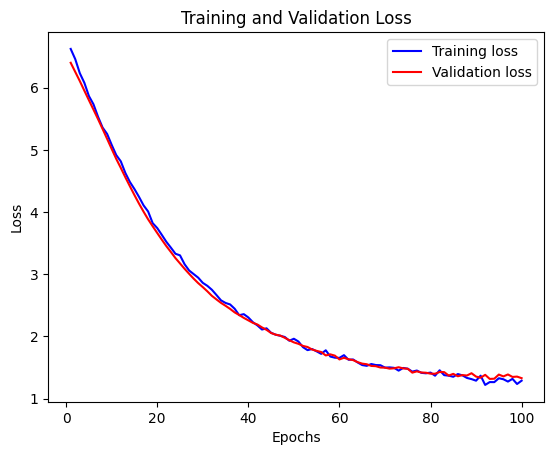

Training Accuracy: 0.6833
Validation Accuracy: 0.6650
Train: 0.813, Test: 0.670
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.40      1.00      0.57         6
           2       0.00      0.00      0.00         4
           3       0.87      0.68      0.76        19
           4       0.00      0.00      0.00         1
           5       0.50      0.30      0.38        10
           6       1.00      0.43      0.60         7
           7       0.50      0.67      0.57         9
           8       0.56      0.83      0.67        12
           9       0.50      0.17      0.25         6
          10       0.75      0.71      0.73        17
          11       0.62      0.83      0.71         6
          12       0.55      0.60      0.57        10
          13       0.75      0.75      0.75         4
          14       0.00      0.00      0.00         0
          15     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

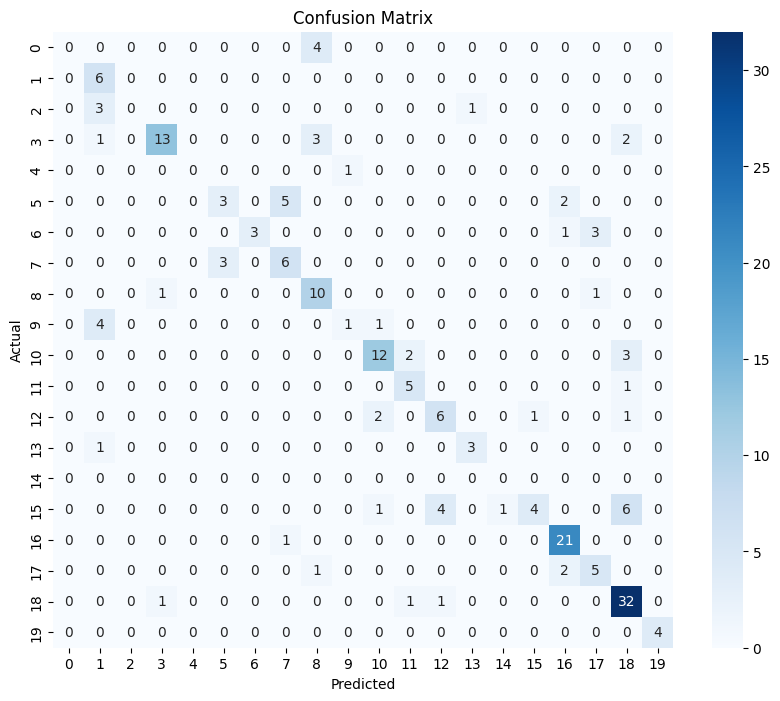

In [ ]:
#TODO:
model_3, history_3 = define_model(
    optimization='adam',
    regularization_type='l1',
    early_stopping=True,
    dropout=0.2,
)
loss_curve_plot(history_3)
#print out confusion matrix and error analysis metrics after the cell
# Evaluate the model
_, train_acc = model_3.evaluate(x_train_scaled, y_train, verbose=0)
_, test_acc = model_3.evaluate(x_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

y_pred_prob = model_3.predict(x_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_multiclass = np.argmax(y_test, axis=1)
print(classification_report(y_test_multiclass, y_pred))


#confusion matrix
cm = confusion_matrix(y_test_multiclass, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0415 - loss: 3.9734 - val_accuracy: 0.0550 - val_loss: 3.6688
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0954 - loss: 3.7215 - val_accuracy: 0.0900 - val_loss: 3.6073
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0548 - loss: 3.7398 - val_accuracy: 0.1000 - val_loss: 3.5463
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0902 - loss: 3.6103 - val_accuracy: 0.1150 - val_loss: 3.4775
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1155 - loss: 3.4768 - val_accuracy: 0.1650 - val_loss: 3.4074
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1275 - loss: 3.4119 - val_accuracy: 0.2050 - val_loss: 3.3342
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1634 - loss: 3.2948 - val_accuracy: 0.2300 - val_loss: 3.2620
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1713 - loss: 3.2978 - val_accuracy: 0.2500 - val_loss: 3.

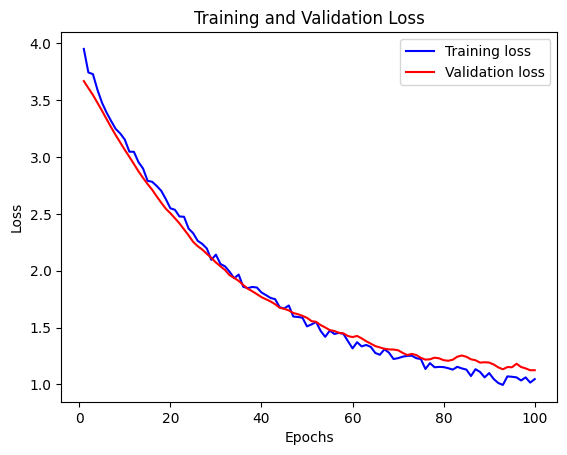

Training Accuracy: 0.6850
Validation Accuracy: 0.6650
Train: 0.845, Test: 0.640
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.60      1.00      0.75         6
           2       0.00      0.00      0.00         4
           3       0.71      0.63      0.67        19
           4       0.00      0.00      0.00         1
           5       0.44      0.40      0.42        10
           6       0.50      0.43      0.46         7
           7       0.50      0.56      0.53         9
           8       0.53      0.67      0.59        12
           9       0.75      0.50      0.60         6
          10       0.73      0.65      0.69        17
          11       0.80      0.67      0.73         6
          12       0.58      0.70      0.64        10
          13       0.67      1.00      0.80         4
          14       0.00      0.00      0.00         0
          15     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

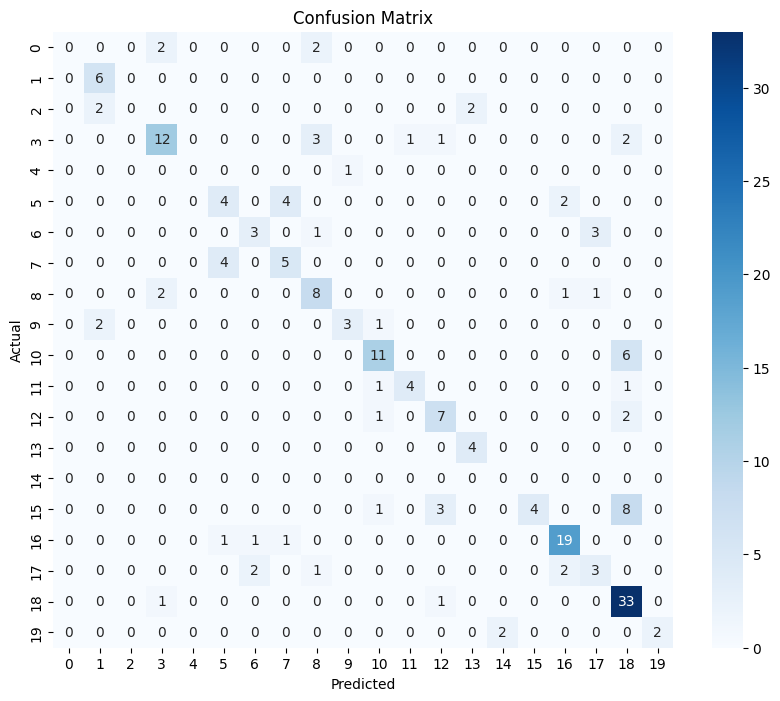

In [ ]:
#TODO:
model_4, history_4 = define_model(
    optimization='SGD',
    regularization_type='l2',
    early_stopping=True,
    dropout=0.2,
)
loss_curve_plot(history_4)
#print out confusion matrix and error analysis metrics after the cell
# Evaluate the model
_, train_acc = model_4.evaluate(x_train_scaled, y_train, verbose=0)
_, test_acc = model_4.evaluate(x_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

y_pred_prob = model_4.predict(x_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_multiclass = np.argmax(y_test, axis=1)
print(classification_report(y_test_multiclass, y_pred))


#confusion matrix
cm = confusion_matrix(y_test_multiclass, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.0870 - loss: 7.2972 - val_accuracy: 0.1150 - val_loss: 6.8020
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1081 - loss: 6.9685 - val_accuracy: 0.1800 - val_loss: 6.6234
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1349 - loss: 6.7075 - val_accuracy: 0.2050 - val_loss: 6.4403
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1631 - loss: 6.4373 - val_accuracy: 0.2500 - val_loss: 6.2460
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2181 - loss: 6.2340 - val_accuracy: 0.3050 - val_loss: 6.0417
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2449 - loss: 5.9598 - val_accuracy: 0.3600 - val_loss: 5.8298
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2684 - loss: 5.7758 - val_accuracy: 0.3900 - val_loss: 5.6205
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2794 - loss: 5.6063 - val_accuracy: 0.4150 - 

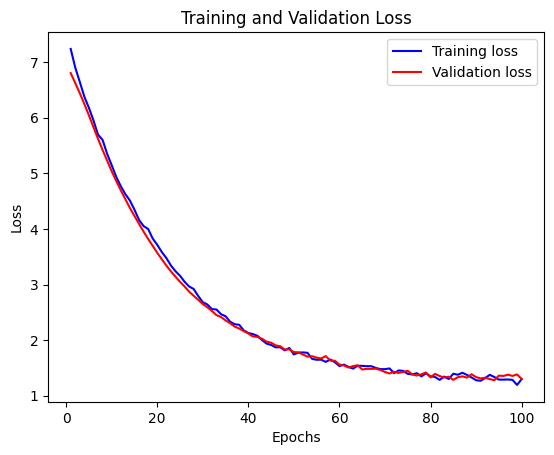

Training Accuracy: 0.6783
Validation Accuracy: 0.6200
Train: 0.820, Test: 0.650
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.55      1.00      0.71         6
           2       0.00      0.00      0.00         4
           3       0.72      0.68      0.70        19
           4       0.00      0.00      0.00         1
           5       0.50      0.20      0.29        10
           6       0.75      0.43      0.55         7
           7       0.50      0.78      0.61         9
           8       0.61      0.92      0.73        12
           9       0.75      0.50      0.60         6
          10       0.80      0.71      0.75        17
          11       0.67      0.33      0.44         6
          12       0.57      0.40      0.47        10
          13       0.60      0.75      0.67         4
          14       0.00      0.00      0.00         0
          15     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

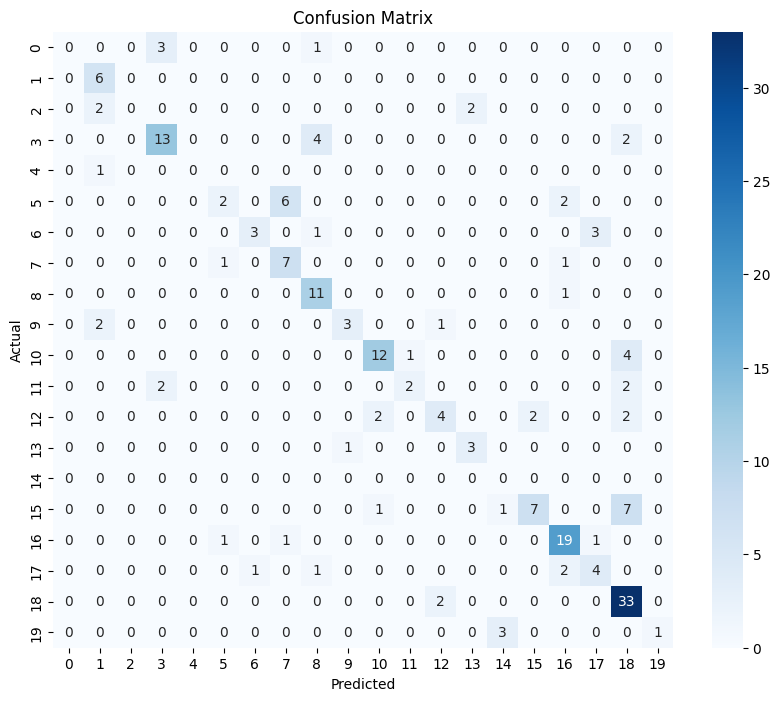

In [ ]:
model_5, history_5 = define_model(
    optimization='RMSprop',
    regularization_type='l1_l2',
    early_stopping=True,
    dropout=0.2,
)
loss_curve_plot(history_5)
#print out confusion matrix and error analysis metrics after the cell
# Evaluate the model
_, train_acc = model_5.evaluate(x_train_scaled, y_train, verbose=0)
_, test_acc = model_5.evaluate(x_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

y_pred_prob = model_5.predict(x_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_multiclass = np.argmax(y_test, axis=1)
print(classification_report(y_test_multiclass, y_pred))


#confusion matrix
cm = confusion_matrix(y_test_multiclass, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression(
    multi_class='multinomial', #for multiclass classification
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

logistic_model.fit(x_train_scaled, y_train_encoded)

y_pred_train = logistic_model.predict(x_train_scaled)
y_pred_test = logistic_model.predict(x_test_scaled)

#Evaluate model
print(classification_report(y_train_encoded, y_pred_train, target_names=label_encoder.classes_))
print(classification_report(y_test_encoded, y_pred_test, target_names=label_encoder.classes_))




                         precision    recall  f1-score   support

             Accountant       1.00      1.00      1.00         6
              Architect       0.84      0.87      0.86        31
                 Artist       0.78      0.70      0.74        20
       Business Manager       1.00      0.97      0.98        31
                   Chef       1.00      1.00      1.00         1
                 Doctor       0.79      0.73      0.76        15
               Engineer       0.82      0.78      0.80        18
Environmental Scientist       0.82      0.86      0.84        21
      Financial Analyst       0.91      0.94      0.93        33
       Graphic Designer       0.90      0.93      0.92        29
             Journalist       0.97      0.92      0.94        36
                 Lawyer       0.96      0.96      0.96        25
   Marketing Specialist       1.00      0.95      0.97        40
               Musician       1.00      1.00      1.00        24
                  Nurse 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: Undefine

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
def make_predictions(model_path, X):

    # Load the model
    model = load_model(model_path)
    # Make predictions
    predictions = model.predict(X)
    # Convert probabilities to binary labels (0 or 1)

    return predictions

#Modify the code appropriately

In [ ]:
model_path = None
make_predictions(None)

Congratulations!!
